<a href="https://colab.research.google.com/github/nicolaspsilva6/Analise-Completa/blob/main/Analise_completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
 df = pd.read_csv('Base_RH.csv',sep=";")

In [ ]:
df.head()

,Saiu_da_Empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,8,Sim,11,0,8,0,Ruim,6,4,0,5
1,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,1,Não,23,1,10,3,Muito bom,10,7,1,7
2,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,6,Sim,15,0,7,3,Muito bom,0,0,0,0
3,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,1,Sim,11,0,8,3,Muito bom,8,7,3,0
4,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,9,Não,12,1,6,3,Muito bom,2,2,2,2


In [ ]:
df.columns

Index(['Saiu_da_Empresa', 'Idade', 'Frequência de Viagens',
       'Distância_do_trabalho', 'Formação', 'E-Sat', 'Gênero', 'Estado_Civil',
       'Salário', 'Qte_Empresas_Trabalhadas', 'Faz_hora_extras?',
       'Perc_de_aumento', 'Qte_ações_da_empresa', 'Tempo_de_carreira',
       'Horas_de_treinamento', 'Equilibrio_de_Vida', 'Tempo_de_empresa',
       'Anos_no_mesmo_cargo', 'Anos_desde_a_ultima_promocao',
       'Anos_com_o_mesmo_chefe'],
      dtype='object')

In [ ]:
colunas=['saiu_da_empresa', 'idade', 'frequência_de_viagens',
       'distância_do_trabalho', 'formação', 'e_sat', 'genero', 'estado_civil',
       'salário', 'qte_empresas_trabalhadas', 'faz_hora_extras',
       'perc_de_aumento', 'qte_ações_da_empresa', 'tempo_de_carreira',
       'horas_de_treinamento', 'equilibrio_de_Vida', 'tempo_de_empresa',
       'anos_no_mesmo_cargo', 'anos_desde_a_ultima_promocao',
       'anos_com_o_mesmo_chefe']

In [ ]:
df.columns=colunas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   saiu_da_empresa               1470 non-null   object
 1   idade                         1470 non-null   int64 
 2   frequência_de_viagens         1470 non-null   object
 3   distância_do_trabalho         1470 non-null   int64 
 4   formação                      1470 non-null   object
 5   e_sat                         1470 non-null   object
 6   genero                        1470 non-null   object
 7   estado_civil                  1470 non-null   object
 8   salário                       1470 non-null   int64 
 9   qte_empresas_trabalhadas      1470 non-null   int64 
 10  faz_hora_extras               1470 non-null   object
 11  perc_de_aumento               1470 non-null   int64 
 12  qte_ações_da_empresa          1470 non-null   int64 
 13  tempo_de_carreira 

In [ ]:
df.drop_duplicates()

,saiu_da_empresa,idade,frequência_de_viagens,distância_do_trabalho,formação,e_sat,genero,estado_civil,salário,qte_empresas_trabalhadas,faz_hora_extras,perc_de_aumento,qte_ações_da_empresa,tempo_de_carreira,horas_de_treinamento,equilibrio_de_Vida,tempo_de_empresa,anos_no_mesmo_cargo,anos_desde_a_ultima_promocao,anos_com_o_mesmo_chefe
0,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,8,Sim,11,0,8,0,Ruim,6,4,0,5
1,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,1,Não,23,1,10,3,Muito bom,10,7,1,7
2,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,6,Sim,15,0,7,3,Muito bom,0,0,0,0
3,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,1,Sim,11,0,8,3,Muito bom,8,7,3,0
4,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,9,Não,12,1,6,3,Muito bom,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Não,36,Viaja frequentemente,23,Ensino Técnico,Alto,H,Casado,2571,4,Não,17,1,17,3,Muito bom,5,2,0,3
1466,Não,39,Viaja raramente,6,Ensino Médio,Muito Alto,H,Casado,9991,4,Não,15,1,9,5,Muito bom,7,7,1,7
1467,Não,27,Viaja raramente,4,Ensino Superior,Médio,H,Casado,6142,1,Sim,20,1,6,0,Muito bom,6,2,0,3
1468,Não,49,Viaja frequentemente,2,Ensino Superior,Muito Alto,H,Casado,5390,2,Não,14,0,17,3,Bom,9,6,0,8


In [ ]:
df.dropna()

,saiu_da_empresa,idade,frequência_de_viagens,distância_do_trabalho,formação,e_sat,genero,estado_civil,salário,qte_empresas_trabalhadas,faz_hora_extras,perc_de_aumento,qte_ações_da_empresa,tempo_de_carreira,horas_de_treinamento,equilibrio_de_Vida,tempo_de_empresa,anos_no_mesmo_cargo,anos_desde_a_ultima_promocao,anos_com_o_mesmo_chefe
0,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,8,Sim,11,0,8,0,Ruim,6,4,0,5
1,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,1,Não,23,1,10,3,Muito bom,10,7,1,7
2,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,6,Sim,15,0,7,3,Muito bom,0,0,0,0
3,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,1,Sim,11,0,8,3,Muito bom,8,7,3,0
4,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,9,Não,12,1,6,3,Muito bom,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Não,36,Viaja frequentemente,23,Ensino Técnico,Alto,H,Casado,2571,4,Não,17,1,17,3,Muito bom,5,2,0,3
1466,Não,39,Viaja raramente,6,Ensino Médio,Muito Alto,H,Casado,9991,4,Não,15,1,9,5,Muito bom,7,7,1,7
1467,Não,27,Viaja raramente,4,Ensino Superior,Médio,H,Casado,6142,1,Sim,20,1,6,0,Muito bom,6,2,0,3
1468,Não,49,Viaja frequentemente,2,Ensino Superior,Muito Alto,H,Casado,5390,2,Não,14,0,17,3,Bom,9,6,0,8


In [ ]:
df["salario_com_juros"]= df["salário"]*df["perc_de_aumento"]/100 +df["salário"]

In [ ]:
df.head()

,saiu_da_empresa,idade,frequência_de_viagens,distância_do_trabalho,formação,e_sat,genero,estado_civil,salário,qte_empresas_trabalhadas,...,perc_de_aumento,qte_ações_da_empresa,tempo_de_carreira,horas_de_treinamento,equilibrio_de_Vida,tempo_de_empresa,anos_no_mesmo_cargo,anos_desde_a_ultima_promocao,anos_com_o_mesmo_chefe,salario_com_juros
0,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,8,...,11,0,8,0,Ruim,6,4,0,5,6652.23
1,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,1,...,23,1,10,3,Muito bom,10,7,1,7,6309.90
2,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,6,...,15,0,7,3,Muito bom,0,0,0,0,2403.50
3,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,1,...,11,0,8,3,Muito bom,8,7,3,0,3228.99
4,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,9,...,12,1,6,3,Muito bom,2,2,2,2,3884.16


In [ ]:
saida = df["saiu_da_empresa"].value_counts()

In [ ]:
saida.head()

,count
saiu_da_empresa,
Não,1233
Sim,237


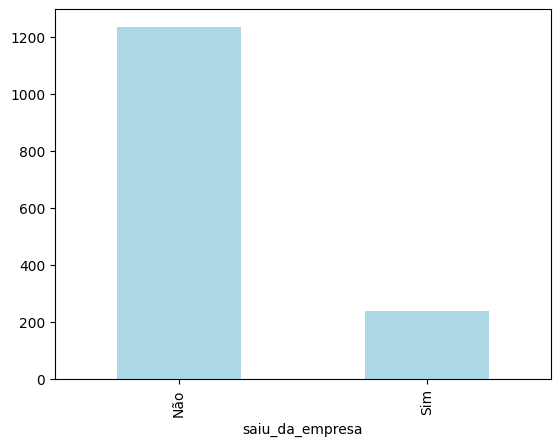

In [ ]:
saida.plot(kind="bar",color="lightblue");

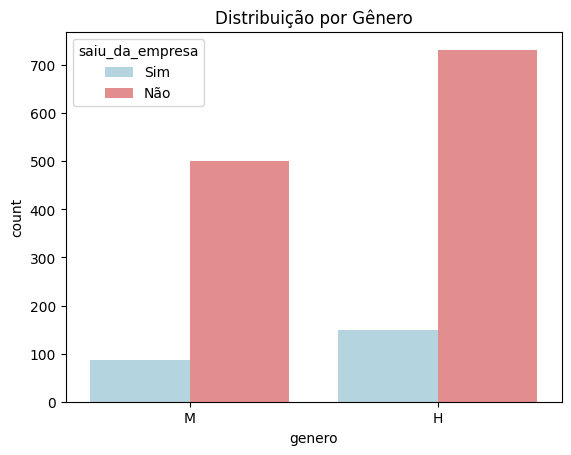

In [ ]:
sns.countplot(data=df, x='genero', hue='saiu_da_empresa', palette={'Sim': 'lightblue', 'Não': 'lightcoral'})
plt.title('Distribuição por Gênero')
plt.show()


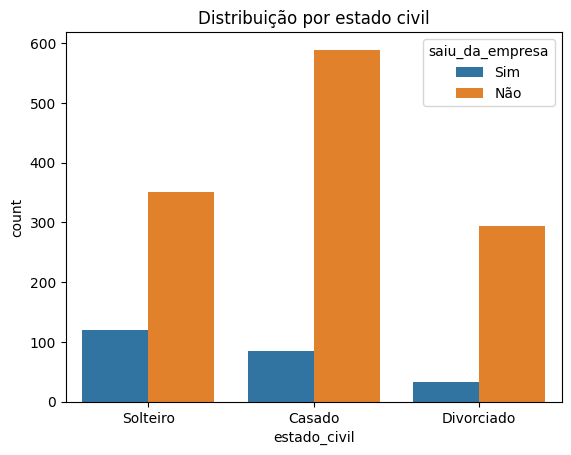

In [ ]:
#saida da empresa por genero
sns.countplot(data=df, x='estado_civil', hue='saiu_da_empresa')
plt.title('Distribuição por estado civil')
plt.show()


In [ ]:
#criando tabela de frequencia da variavel "frequencia de viagens"
df1=pd.DataFrame(df["frequência_de_viagens"].value_counts())

df1.columns=["frequência"]
total=df1["frequência"].sum()

df1["freq_Relativa"]=(df1["frequência"]/total).round(2)
df1["freq_acumulada"]=df1["freq_Relativa"].cumsum().round(2)
print("calculo da frequencia de viagens")
df1.head()

calculo da frequencia de viagens


,frequência,freq_Relativa,freq_acumulada
frequência_de_viagens,,,
Viaja raramente,1043,0.71,0.71
Viaja frequentemente,277,0.19,0.90
Não viaja,150,0.10,1.00


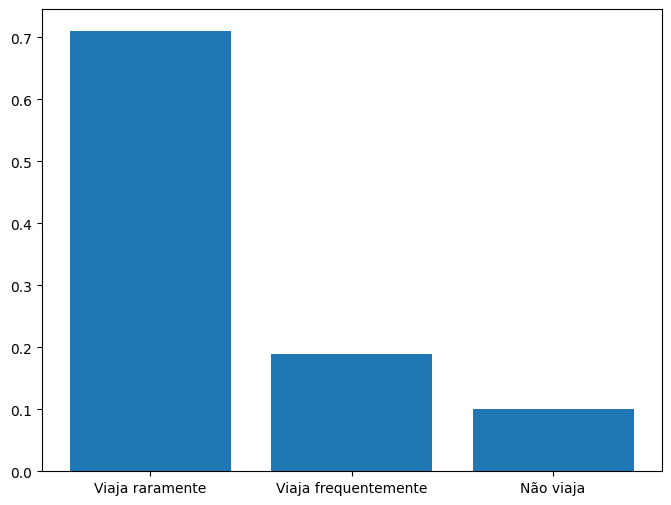

In [ ]:
#grafico
plt.figure(figsize=(8,6));
plt.bar(df1.index, df1['freq_Relativa']); # Changed df to df1 to access 'freq_Relativa'


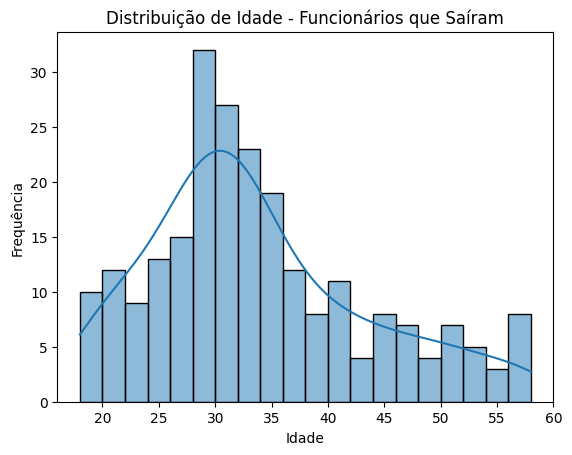

In [ ]:



df['saiu_da_empresa'].value_counts()
df['saiu_da_empresa'].value_counts(normalize=True) * 100  # Percentual




sns.histplot(df[df['saiu_da_empresa'] == 'Sim']['idade'], bins=20, kde=True)
plt.title('Distribuição de Idade - Funcionários que Saíram')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()






In [ ]:
df["saiu_da_empresa"]=df["matricula_funcionario"].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   saiu_da_empresa               1470 non-null   object 
 1   idade                         1470 non-null   int64  
 2   frequência_de_viagens         1470 non-null   object 
 3   distância_do_trabalho         1470 non-null   int64  
 4   formação                      1470 non-null   object 
 5   e_sat                         1470 non-null   object 
 6   genero                        1470 non-null   object 
 7   estado_civil                  1470 non-null   object 
 8   salário                       1470 non-null   int64  
 9   qte_empresas_trabalhadas      1470 non-null   int64  
 10  faz_hora_extras               1470 non-null   object 
 11  perc_de_aumento               1470 non-null   int64  
 12  qte_ações_da_empresa          1470 non-null   int64  
 13  tem

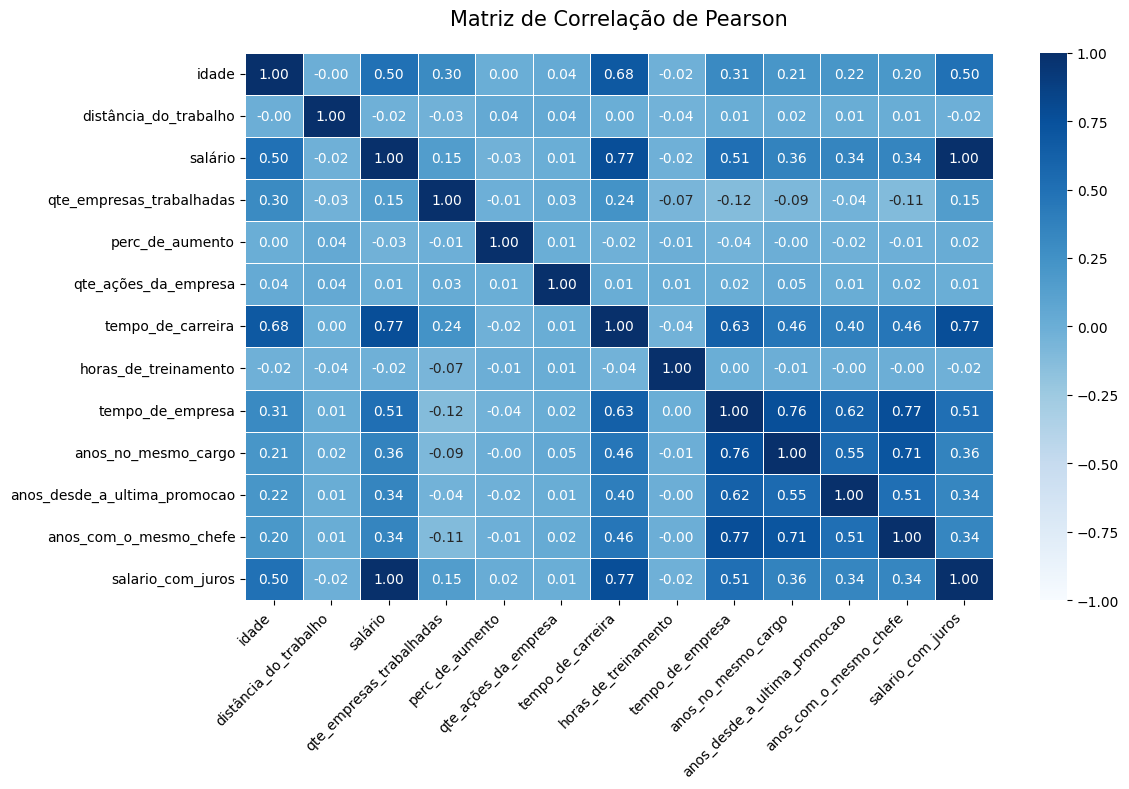

In [ ]:

colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# 2. Criar um novo DataFrame apenas com as colunas numéricas
df_numerico = df[colunas_numericas].copy()


# 3. Calcular a matriz de correlação
correlacao = df_numerico.corr(method='pearson')

# 4. Configurar o tamanho da figura
plt.figure(figsize=(12, 8))

# 5. Criar o heatmap
sns.heatmap(correlacao,
            cmap="Blues",
            vmin=-1,
            vmax=1,
            annot=True,
            fmt=".2f",  # Formato com 2 casas decimais
            linewidths=0.5,
            annot_kws={"size": 10})

# 6. Ajustar o layout e mostrar
plt.title('Matriz de Correlação de Pearson', pad=20, fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Ajuste do Modelo de Regressão usando a biblioteca Statsmodels
#Variavel respostas
#Ajuste do Modelo de Regressão usando a biblioteca Statsmodels
#Variavel respostas
y = df["saiu_da_empresa"].map({'Sim': 1, 'Não': 0}) # Convert '
#Variavel explicativa
x=df[["tempo_de_carreira"]] # Corrected column name here

In [ ]:
#Ajuste de Modelo
modelo=sm.OLS(y,x);
modelo=modelo.fit();
print(modelo.summary());

                                 OLS Regression Results                                
Dep. Variable:        saiu_da_empresa   R-squared (uncentered):                   0.058
Model:                            OLS   Adj. R-squared (uncentered):              0.058
Method:                 Least Squares   F-statistic:                              91.07
Date:                Thu, 10 Apr 2025   Prob (F-statistic):                    5.53e-21
Time:                        15:03:35   Log-Likelihood:                         -700.28
No. Observations:                1470   AIC:                                      1403.
Df Residuals:                    1469   BIC:                                      1408.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------